<a href="https://colab.research.google.com/github/Mrthuancao/CS1114.M21.KHCL.N05/blob/main/Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Yolov5-posture_recog/yolov5

Mounted at /content/drive
/content/drive/MyDrive/Yolov5-posture_recog/yolov5


In [ ]:
!pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 30.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image

In [ ]:
!pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.8 MB 7.2 MB/s 
     |████████████████████████████████| 181 kB 67.4 MB/s 
     |████████████████████████████████| 145 kB 54.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#Defining helper function

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#Train

In [ ]:
# Train YOLOv5s on best weights for 2000 epochs, batch size 16, 640 pixels with RAM support
!python train.py --img 640 --batch 16 --epochs 2000 --data /content/drive/MyDrive/Yolov5-posture_recog/Data/data.yaml --weights /content/drive/MyDrive/Yolov5-posture_recog/yolov5/runs/train/exp17/weights/best.pt --cache
# The output will be save in ../yolov5/runs/train/exp__/

wandb: Currently logged in as: tomcao. Use `wandb login --relogin` to force relogin
train: weights=/content/drive/MyDrive/Yolov5-posture_recog/yolov5/runs/train/exp17/weights/best.pt, cfg=, data=/content/drive/MyDrive/Yolov5-posture_recog/Data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 11 (delta 5), reused 6 (delta 5), pack-reused 1
Unpacking objects: 100

#Validation

In [ ]:
!python val.py --weights /content/drive/MyDrive/Yolov5-posture_recog/yolov5/runs/train/exp18/weights/best.pt --data /content/drive/MyDrive/Yolov5-posture_recog/Test-Final/data.yaml --img 640 --conf-thres 0.5 --iou-thres 0.5

val: data=/content/drive/MyDrive/Yolov5-posture_recog/Test-Final/data.yaml, weights=['/content/drive/MyDrive/Yolov5-posture_recog/yolov5/runs/train/exp18/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.5, iou_thres=0.5, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
100% 755k/755k [00:00<00:00, 17.9MB/s]
val: Scanning '/content/drive/MyDrive/Yolov5-posture_recog/yolov5/../Test-Final/test/labels.cache' images and labels... 1185 found, 0 missing, 0 empty, 0 corrupt: 100% 1185/1185 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 38/38 [00:29<00:00,  1.30it/s]
                 all

#Test

<IPython.core.display.Javascript object>

Saved to photo.jpg


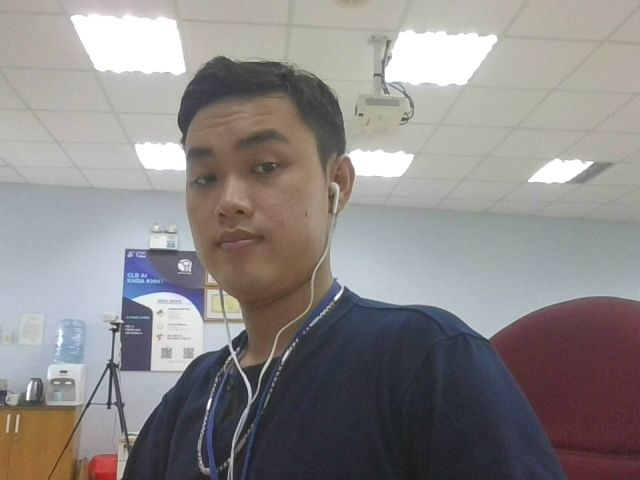

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Yolov5-posture_recog/yolov5/runs/train/exp18/weights/best.pt --source "/content/drive/MyDrive/Data /Data_Test/VuonVai" --img 640 --iou-thres 0.5 --max-det 1 --exist-ok --name 'exp104' --save-crop --nosave

detect: weights=['/content/drive/MyDrive/Yolov5-posture_recog/yolov5/runs/train/exp18/weights/best.pt'], source=/content/drive/MyDrive/Data /Data_Test/VuonVai, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.5, max_det=1, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=True, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp104, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/103 /content/drive/.shortcut-targets-by-id/1w70_DTD1P3LP5Rv-3hM6hMxclH56RVHO/Data/Data_Test/VuonVai/WIN_20220616_15_39_29_Pro.jpg: 384x640 1 S, Done. (0.017s)
image 2/103 /content/drive/.shortcut-targets-by-id/1w70_DTD1P3LP5Rv-3hM6hMxclH56RVHO/Data/Data_Test/VuonVai/WIN_20220

#Deploy in Python

In [ ]:
import torch

# Model
model = torch.hub.load('/content/drive/MyDrive/Yolov5-posture_recog/yolov5/', 'custom', path='/content/drive/MyDrive/Yolov5-posture_recog/yolov5/runs/train/exp18/weights/best.pt', source='local')

# Images
imgs = ['/content/drive/MyDrive/Data/Data_Test/CanMongTay/WIN_20220616_15_30_01_Pro.jpg']  # batch of images

# Inference
results = model(imgs)
crops = results.crop(save=True) 

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/drive/MyDrive/Yolov5-posture_recog/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
Saved 1 image to runs/detect/exp102
Saved results to runs/detect/exp102

Saved 1 image to runs/detect/exp103


image 1/1: 720x1280 1 HP
Speed: 2695.7ms pre-process, 28.3ms inference, 60.5ms NMS per image at shape (1, 3, 384, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,224.639313,10.112488,1203.210571,716.467957,0.384111,3,HP


In [ ]:
%matplotlib inline

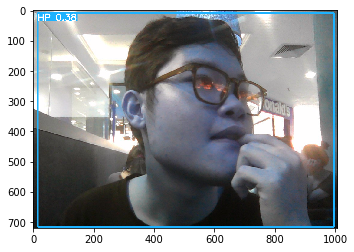

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(crops[0]['im'], interpolation='nearest')
plt.show()